In [6]:
import cv2
import click
import os
import matplotlib.pyplot as plt

imagepath = "./"

**Processing image**

In [7]:
# Read the foreground image with alpha channel
foreGroundImage = cv2.imread(os.path.join(
    imagepath, 'foreGroundAsset.png'), -1)

# Split png foreground image
b, g, r, a = cv2.split(foreGroundImage)

# Save the foregroung RGB content into a single object
foreground = cv2.merge((b, g, r))

# Save the alpha information into a single Mat
alpha = cv2.merge((a, a, a))

# Read background image
background = cv2.imread(os.path.join(imagepath, 'backGround.jpg'))

# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)
alpha = alpha.astype(float)/255

# Perform alpha blending
foreground = cv2.multiply(alpha, foreground)
background = cv2.multiply(1.0 - alpha, background)
outImage = cv2.add(foreground, background)

cv2.imwrite(os.path.join(imagepath, "outImgPy.png"), outImage)

True

**Show image using matplotlib**

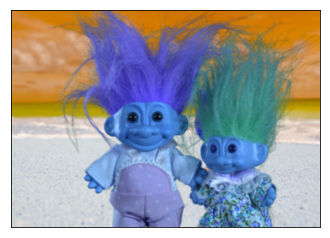

In [10]:
img = cv2.imread(os.path.join(imagepath, "outImgPy.png"))
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()